# Brain Tumor Classification (MRI) - CNN
<br>
<br>

## The Data

The Dataset comes from: https://www.kaggle.com/sartajbhuvaji/brain-tumor-classification-mri
<br>
<br>

## Abstract
<p>A Brain tumor is considered as one of the aggressive diseases, among children and adults. Brain tumors account for 85 to 90 percent of all primary Central Nervous System(CNS) tumors. Every year, around 11,700 people are diagnosed with a brain tumor. The 5-year survival rate for people with a cancerous brain or CNS tumor is approximately 34 percent for men and36 percent for women. Brain Tumors are classified as: Benign Tumor, Malignant Tumor, Pituitary Tumor, etc. Proper treatment, planning, and accurate diagnostics should be implemented to improve the life expectancy of the patients. The best technique to detect brain tumors is Magnetic Resonance Imaging (MRI). A huge amount of image data is generated through the scans. These images are examined by the radiologist. A manual examination can be error-prone due to the level of complexities involved in brain tumors and their properties.
Application of automated classification techniques using Machine Learning(ML) and Artificial Intelligence(AI)has consistently shown higher accuracy than manual classification. Hence, proposing a system performing detection and classification by using Deep Learning Algorithms using ConvolutionNeural Network (CNN), Artificial Neural Network (ANN), and TransferLearning (TL) would be helpful to doctors all around the world.</p>

<br>

## Context
<p>Brain Tumors are complex. There are a lot of abnormalities in the sizes and location of the brain tumor(s). This makes it really difficult for complete understanding of the nature of the tumor. Also, a professional Neurosurgeon is required for MRI analysis. Often times in developing countries the lack of skillful doctors and lack of knowledge about tumors makes it really challenging and time-consuming to generate reports from MRI’. So an automated system on Cloud can solve this problem.</p>

<br>

## Task
<p>To Detect and Classify Brain Tumor</p>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.image import imread
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import os
import cv2
import random

%matplotlib inline

In [2]:
data_dir = 'C:\\Users\\Dawid\\Desktop\\PYTHON\\ML\\Projects\\Brain Tumor Classification (MRI)\\Data'

In [3]:
os.listdir(data_dir)

['Testing', 'Training']

In [4]:
# Create paths to testing and training data
test_path = data_dir + '\\Testing\\'
train_path = data_dir + '\\Training\\'
# Create list of paths
paths = [test_path, train_path]

In [6]:
os.listdir(test_path)

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [7]:
# Creating list of categories
categories = os.listdir(test_path)

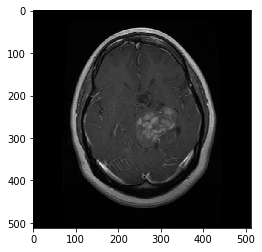

In [8]:
# Checking a photo
for category in categories:
    path = os.path.join(train_path, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

In [9]:
# Shape of a photo
print(img_array.shape)

(512, 512)


In [10]:
# Create tuple with a new shape parameters to implement on photos
image_shape = (150, 150)

In [12]:
full_data = []

'''
The function creates a full dataset

1. For each category, in evry paths
2. Assign a class number equal to the index of the category
3. Read the photos using opencv in greyscale
4. Change the shape of these photos using opencv
5. Add every photo data + class number to the list

'''

def create_full_data():
    for category in categories: # 1
        for path in range(len(paths)):
            path = os.path.join(paths[path], category)
            class_num = categories.index(category) # 2
            for img in os.listdir(path):
                try:
                    img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) # 3
                    new_array = cv2.resize(img_array, image_shape) # 4
                    full_data.append([new_array, class_num]) # 5
                except Exception as e:
                    pass
            
create_full_data()

In [14]:
# How much data is there?
len(full_data)

3264

In [15]:
# Shuffle the data
random.shuffle(full_data)

In [16]:
# Create empty lists X, y
X = []
y = []

In [17]:
# To X append feature and to y label - specific class number

# CLASS NAME:     CLASS NUMBER:
#-------------------------------
# glioma_tumor          - 0
# meningioma_tumor      - 1
# no_tumor              - 2
# pituitary_tumor       - 3

for feature, label in full_data:
    X.append(feature)
    y.append(label)

# Reshape and make 'X' array
X = np.array(X).reshape(-1, image_shape[0], image_shape[1],  1)

In [18]:
# Check shape of X.
X.shape

(3264, 150, 150, 1)

In [24]:
# Scale the X
X = X/255

In [26]:
# Make 'y' array
y = np.array(y)

# Check shape of y
y.shape

(3264,)

In [27]:
# Create y_cat using to_categorical
y_cat = to_categorical(y)

In [44]:
# Check shape of y_cat. 4 categories, that's good.
y_cat.shape

(3264, 4)

In [29]:
# TRAIN_TEST_SPLIT
# Split the data and check their shapes
X_train, X_val, Y_train, Y_val = train_test_split(X, y_cat, test_size = 0.2, random_state=42)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (2611, 150, 150, 1)
x_test shape (653, 150, 150, 1)
y_train shape (2611, 4)
y_test shape (653, 4)


In [30]:
# Create the model
model = Sequential()

##
model.add(Conv2D(filters=64, kernel_size=(5,5), input_shape = (image_shape[0], image_shape[1] , 1), 
                 activation = 'relu', padding = 'Same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
##
model.add(Conv2D(filters=128, kernel_size=(3,3), input_shape = (image_shape[0], image_shape[1] , 1), 
                 activation = 'relu', padding = 'Same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
##
model.add(Conv2D(filters=128, kernel_size=(3,3), input_shape = (image_shape[0], image_shape[1] , 1), 
                 activation = 'relu', padding = 'Same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
##
model.add(Conv2D(filters=128, kernel_size=(2,2), input_shape = (image_shape[0], image_shape[1] , 1), 
                 activation = 'relu', padding = 'Same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
##
model.add(Conv2D(filters = 256, kernel_size = (2,2),input_shape = (image_shape[0], image_shape[1] , 1), 
                 activation = 'relu', padding = 'Same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))


model.add(Flatten())

model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.5))
# output layer softmax - multi class
model.add(Dense(4, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [31]:
# Create EarlyStopping object - monitor val_loss
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5)

In [32]:
# Create datagen object using ImageDataGenerator
# Generates batches of tensor image data. Here we onlny using horizontal_flip parameter.
# I don't want to cut or distort the images because we're checking for a tumor in the brain.
# Image manipulation may worsen the efficiency of its detection.

datagen = ImageDataGenerator(horizontal_flip=True)

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 64)      1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 128)       1

In [34]:
batch_size = 40
datagen.fit(X_train)
model.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch_size),
                              epochs = 50, validation_data = (X_val, Y_val),
                              steps_per_epoch = X_train.shape[0] // batch_size,
                   callbacks = [early_stop])

C:\Users\Dawid\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
65/65 [==============================] - 304s 5s/step - loss: 1.3648 - accuracy: 0.3400 - val_loss: 1.2183 - val_accuracy: 0.4747
Epoch 2/50
65/65 [==============================] - 304s 5s/step - loss: 1.1077 - accuracy: 0.5361 - val_loss: 0.9210 - val_accuracy: 0.6202
Epoch 3/50
65/65 [==============================] - 312s 5s/step - loss: 0.9320 - accuracy: 0.5907 - val_loss: 0.9541 - val_accuracy: 0.5498
Epoch 4/50
65/65 [==============================] - 311s 5s/step - loss: 0.8159 - accuracy: 0.6470 - val_loss: 0.7735 - val_accuracy: 0.6616
Epoch 5/50
65/65 [==============================] - 318s 5s/step - loss: 0.7360 - accuracy: 0.6935 - val_loss: 0.8125 - val_accuracy: 0.6462
Epoch 6/50
65/65 [==============================] - 317s 5s/step - loss: 0.6976 - accuracy: 0.7114 - val_loss: 0.6792 - val_accuracy: 0.7274
Epoch 7/50
65/65 [==============================] - 321s 5s/step - loss: 0.6247 - accuracy: 0.7190 - val_loss: 0.7985 - val_accuracy: 0.6447
Epoch 8/50
65

In [35]:
metrics = pd.DataFrame(model.history.history)

In [36]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

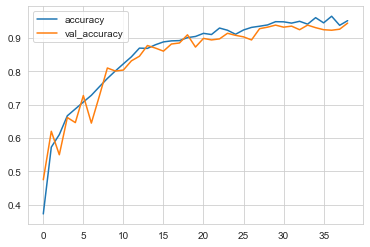

In [37]:
sns.set_style('whitegrid')

# Plot the Accuracys metrics
metrics[['accuracy', 'val_accuracy']].plot()

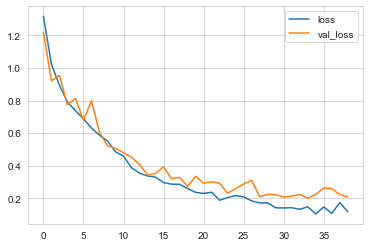

In [38]:
# Plot the loses metrics

metrics[['loss', 'val_loss']].plot()

In [39]:
# 0.2 val_loss & 94% val_accuracy
model.evaluate(X_val, Y_val, verbose=0)

[0.208925262093544, 0.9448698163032532]

In [40]:
# Create y_test - inverse of Y_val.to_categorical
y_test = np.argmax(Y_val, axis=1)

In [41]:
# Prediction
predictions = model.predict_classes(X_val)

C:\Users\Dawid\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [42]:
# Print classification report: y_test vs predictions

# CLASS NAME:     CLASS NUMBER:
#-------------------------------
# glioma_tumor          - 0
# meningioma_tumor      - 1
# no_tumor              - 2
# pituitary_tumor       - 3

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       175
           1       0.92      0.96      0.94       197
           2       0.96      0.92      0.94       100
           3       0.98      0.97      0.98       181

    accuracy                           0.94       653
   macro avg       0.95      0.94      0.94       653
weighted avg       0.95      0.94      0.94       653



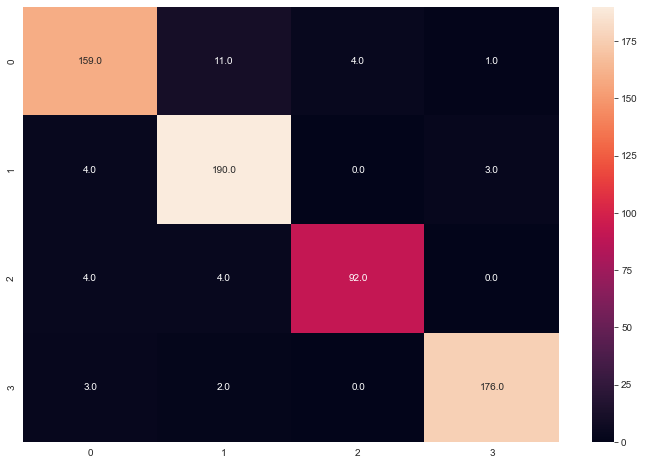

In [46]:
# Confusion Matrix
plt.figure(figsize = (12,8))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True, fmt = ".1f")

The accuracy of the entire model is 94%.
F1 scores are also on a good level from 92% to 98%.